Sample count per class:
Classes
A    151
B    123
C     68
Name: count, dtype: int64

Summary statistics:
       Sample Number   Feature 1   Feature 2   Feature 3    Feature 4
count     342.000000  342.000000  342.000000  342.000000   342.000000
mean      171.500000   43.921930   17.151170  200.915205  4201.754386
std        98.871128    5.459584    1.974793   14.061714   801.954536
min         1.000000   32.100000   13.100000  172.000000  2700.000000
25%        86.250000   39.225000   15.600000  190.000000  3550.000000
50%       171.500000   44.450000   17.300000  197.000000  4050.000000
75%       256.750000   48.500000   18.700000  213.000000  4750.000000
max       342.000000   59.600000   21.500000  231.000000  6300.000000

Interquartile Ranges:
Feature 1: 9.27
Feature 2: 3.10
Feature 3: 23.00
Feature 4: 1200.00


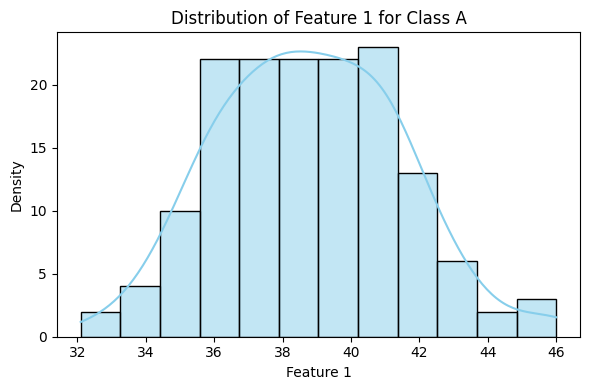

<ipython-input-6-5fd25815cc88>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Classes', y='Feature 2', palette='Set2')


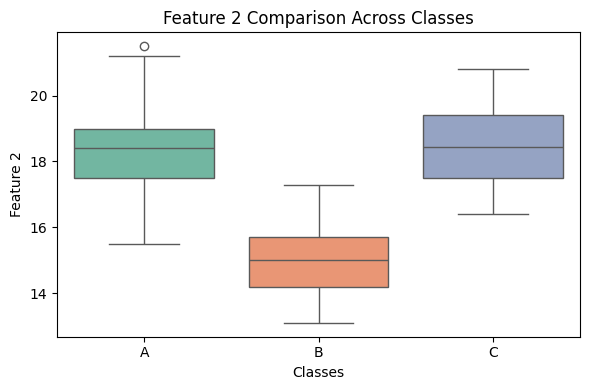

<ipython-input-6-5fd25815cc88>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Classes', y='Feature 3', palette='muted')


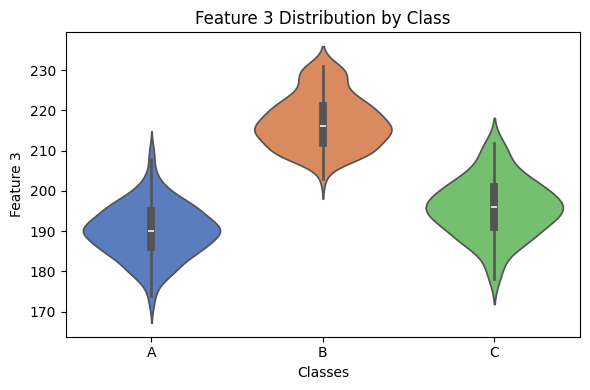

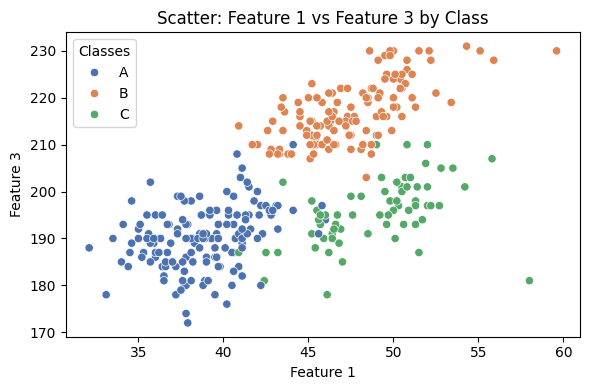

<ipython-input-6-5fd25815cc88>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('viridis', len(class_labels))
<ipython-input-6-5fd25815cc88>:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


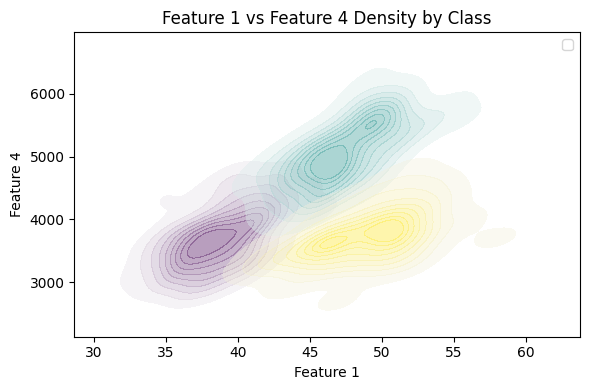

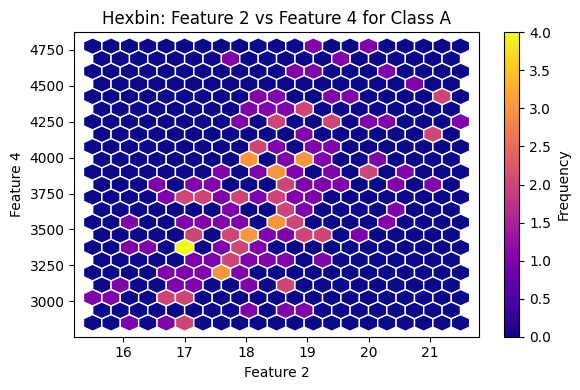

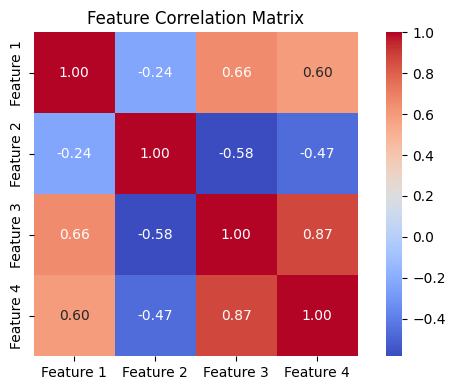

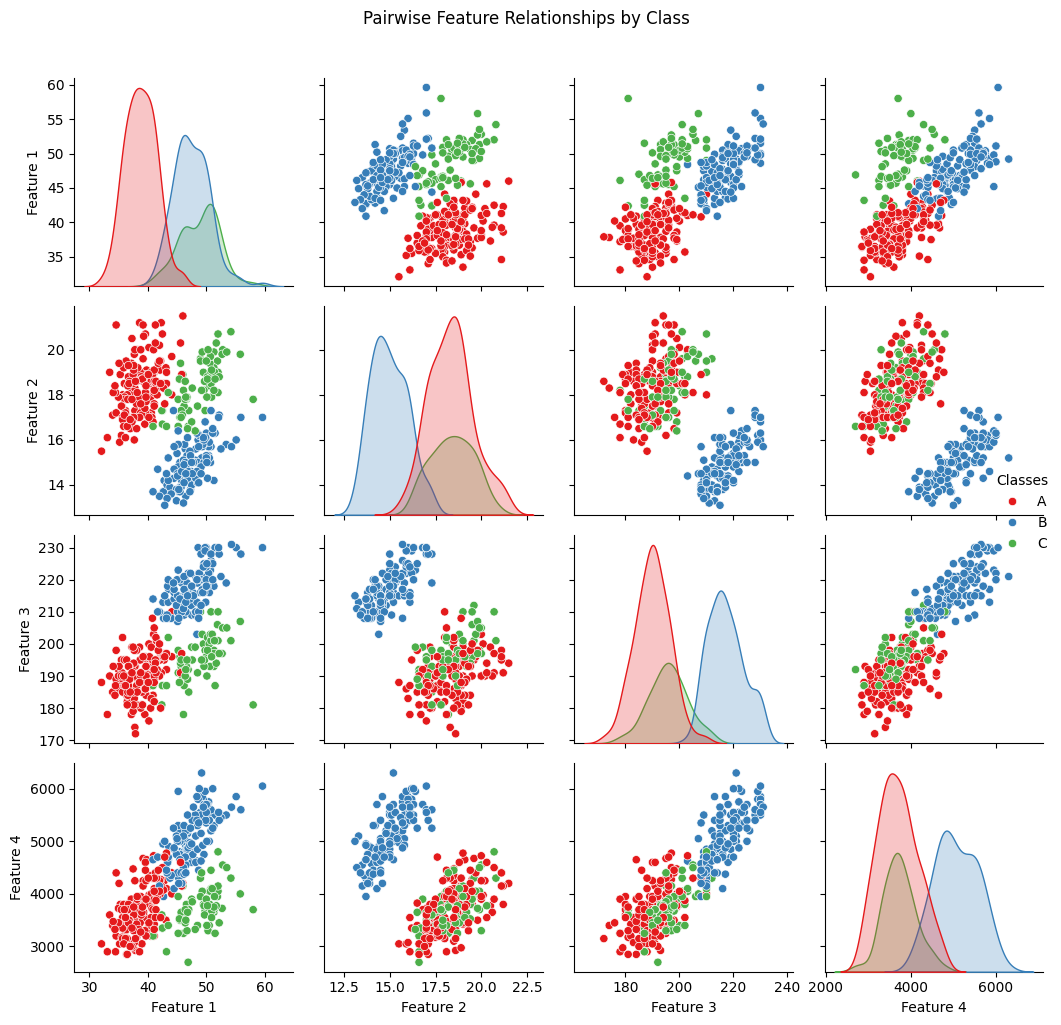

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from matplotlib import cm

# Load the dataset
data = pd.read_csv('A1.csv')

# (a) Class distribution
print("Sample count per class:")
print(data['Classes'].value_counts())

# (b) Statistical overview and IQR for each feature
print("\nSummary statistics:")
print(data.describe())

print("\nInterquartile Ranges:")
for col in ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']:
    print(f"{col}: {iqr(data[col]):.2f}")

# (c) Histogram: Feature 1 for Class A
plt.figure(figsize=(6, 4))
sns.histplot(data[data['Classes'] == 'A']['Feature 1'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Feature 1 for Class A')
plt.xlabel('Feature 1')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# (d) Boxplot of Feature 2 by class
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Classes', y='Feature 2', palette='Set2')
plt.title('Feature 2 Comparison Across Classes')
plt.tight_layout()
plt.show()

# (e) Violin plot for Feature 3 by class
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='Classes', y='Feature 3', palette='muted')
plt.title('Feature 3 Distribution by Class')
plt.tight_layout()
plt.show()

# (f) Feature 1 vs Feature 3 scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Feature 1', y='Feature 3', hue='Classes', palette='deep')
plt.title('Scatter: Feature 1 vs Feature 3 by Class')
plt.tight_layout()
plt.show()

# (g) Contour plot of Feature 1 vs Feature 4 for each class
plt.figure(figsize=(6, 4))
class_labels = data['Classes'].unique()
color_map = cm.get_cmap('viridis', len(class_labels))

for idx, label in enumerate(class_labels):
    subset = data[data['Classes'] == label]
    sns.kdeplot(
        data=subset,
        x='Feature 1',
        y='Feature 4',
        fill=True,
        alpha=0.4,
        label=f"Class {label}",
        cmap=sns.light_palette(color_map(idx), as_cmap=True)
    )

plt.title('Feature 1 vs Feature 4 Density by Class')
plt.legend()
plt.tight_layout()
plt.show()

# (h) Hexbin plot for Feature 2 vs Feature 4 (Class A)
plt.figure(figsize=(6, 4))
subset_A = data[data['Classes'] == 'A']
plt.hexbin(subset_A['Feature 2'], subset_A['Feature 4'], gridsize=20, cmap='plasma', edgecolors='white')
plt.colorbar(label='Frequency')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.title('Hexbin: Feature 2 vs Feature 4 for Class A')
plt.tight_layout()
plt.show()

# (i) Correlation heatmap
plt.figure(figsize=(6, 4))
correlations = data[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# (j) Pairplot showing feature relationships by class
sns.pairplot(data, vars=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'], hue='Classes', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Feature Relationships by Class", y=1.02)
plt.tight_layout()
plt.show()
